In [10]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree

iris=datasets.load_iris()

X=iris.data
y=iris.target

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
from sklearn import metrics

print("Train-Accuracy:",metrics.accuracy_score(y_train,clf.predict(X_train)))
print("TrainConfusion Matrix:",metrics.confusion_matrix(y_train,clf.predict(X_train)))
print("TrainClassification Report:",metrics.classification_report(y_train,clf.predict(X_train)))

print("Test-Accuracy:",metrics.accuracy_score(y_test,clf.predict(X_test)))
print("Test-Confusion Matrix:",metrics.confusion_matrix(y_test,clf.predict(X_test)))
print("Test-Classification Report:",metrics.classification_report(y_test,clf.predict(X_test)))

tree.export_graphviz(clf,out_file='tree.dot')

from io import StringIO

import pydot

out_data=StringIO()

tree.export_graphviz(clf,out_file=out_data,
                     feature_names=iris.feature_names,
                    class_names=clf.classes_.astype(int).astype(str),
                    filled=True,
                    rounded=True,
                    special_characters=True,
                    node_ids=True,
                    )

graph=pydot.graph_from_dot_data(out_data.getvalue())
graph[0].write_pdf("iris.pdf")



Train-Accuracy: 1.0
TrainConfusion Matrix: [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
TrainClassification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        39

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Test-Accuracy: 0.9777777777777777
Test-Confusion Matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test-Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



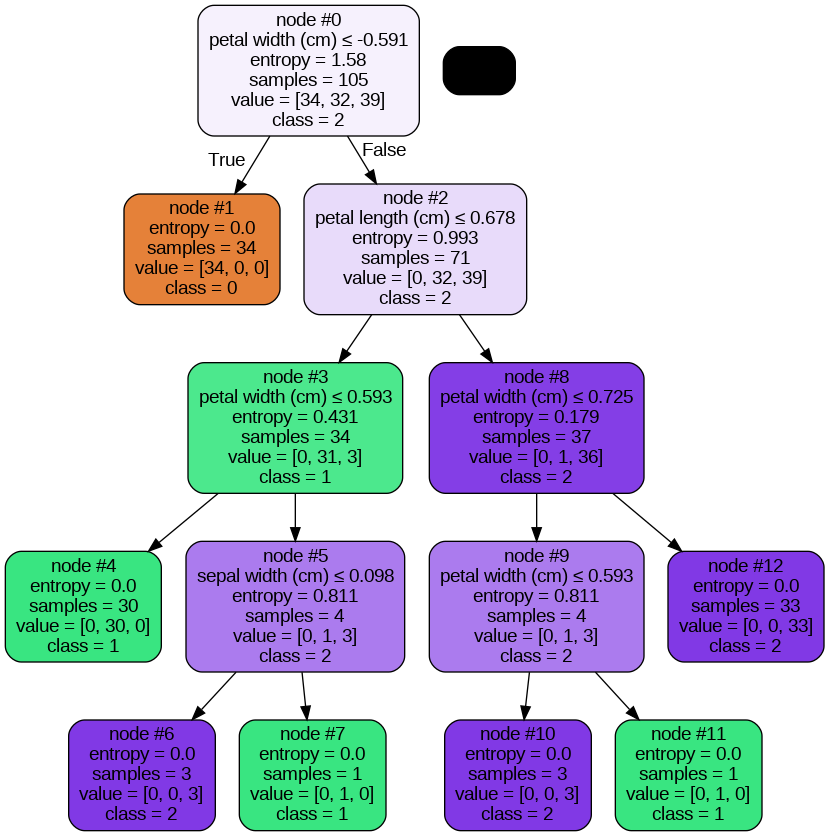

In [ ]:
from IPython.display import Image
import pydotplus


graph = pydotplus.graph_from_dot_data(out_data.getvalue())
Image(graph.create_png())
